In [40]:
# Finding Correlations between Targets and Features to find the important features
import pandas as pd

df = pd.read_csv('ev_battery_charging_data.csv')

numeric_df = df.select_dtypes(include=['float64', 'int64'])
targets = ['Degradation Rate (%)', 'Charging Cycles']

corr_matrix = numeric_df.corr()

for target in targets:
    print(f"\n🔹 Correlation of features with '{target}':\n")
    corr_values = corr_matrix[target].drop(target).sort_values(ascending=False)
    print(corr_values.to_string())



🔹 Correlation of features with 'Degradation Rate (%)':

Charging Duration (min)            0.868795
Optimal Charging Duration Class    0.807085
SOC (%)                            0.431175
Battery Temp (°C)                  0.127583
Voltage (V)                        0.040471
Current (A)                       -0.012550
Charging Cycles                   -0.016808
Ambient Temp (°C)                 -0.037721
Efficiency (%)                    -1.000000

🔹 Correlation of features with 'Charging Cycles':

Efficiency (%)                     0.016808
Voltage (V)                        0.007271
Battery Temp (°C)                  0.001501
Ambient Temp (°C)                 -0.006938
SOC (%)                           -0.009565
Charging Duration (min)           -0.013771
Degradation Rate (%)              -0.016808
Current (A)                       -0.021579
Optimal Charging Duration Class   -0.024994


In [42]:
import pandas as pd
#Only keeping the features with high correlation with target

df = pd.read_csv("ev_battery_charging_data.csv")

columns_to_keep = [
    "Degradation Rate (%)",
    "Charging Duration (min)",
    "Optimal Charging Duration Class",
    "SOC (%)",
    "Battery Temp (°C)"
]

filtered_df = df[columns_to_keep]
filtered_df.to_csv("filtered_ev_battery_data.csv", index=False)

print("✅ New dataset saved as 'filtered_ev_battery_data.csv'")
print("Columns retained:", list(filtered_df.columns))
print("Shape:", filtered_df.shape)


✅ New dataset saved as 'filtered_ev_battery_data.csv'
Columns retained: ['Degradation Rate (%)', 'Charging Duration (min)', 'Optimal Charging Duration Class', 'SOC (%)', 'Battery Temp (°C)']
Shape: (1000, 5)


In [44]:

import pandas as pd
import numpy as np

df = pd.read_csv("filtered_ev_battery_data.csv")

print("✅ Dataset Preview:")
display(df.head())

print("\n📊 Dataset Info:")
df.info()

print("\n🕵️‍♂️ Missing Values Check:")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0] if missing_summary.sum() > 0 else "No missing values found ✅")


✅ Dataset Preview:


,Degradation Rate (%),Charging Duration (min),Optimal Charging Duration Class,SOC (%),Battery Temp (°C)
0,8.805096,59.363552,1,43.708611,33.454060
1,12.186860,67.343566,1,95.564288,35.933628
2,13.832336,105.454739,2,75.879455,25.009358
3,9.318874,54.000439,1,63.879264,32.497482
4,11.687577,106.964968,2,24.041678,31.434920



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Degradation Rate (%)             1000 non-null   float64
 1   Charging Duration (min)          1000 non-null   float64
 2   Optimal Charging Duration Class  1000 non-null   int64  
 3   SOC (%)                          1000 non-null   float64
 4   Battery Temp (°C)                1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB

🕵️‍♂️ Missing Values Check:
No missing values found ✅


✅ Dataset loaded successfully!
Shape: (1000, 5)

Columns: ['Degradation Rate (%)', 'Charging Duration (min)', 'Optimal Charging Duration Class', 'SOC (%)', 'Battery Temp (°C)']

Data types:
Degradation Rate (%)               float64
Charging Duration (min)            float64
Optimal Charging Duration Class      int64
SOC (%)                            float64
Battery Temp (°C)                  float64
dtype: object

--- Missing Values ---
Degradation Rate (%)               0
Charging Duration (min)            0
Optimal Charging Duration Class    0
SOC (%)                            0
Battery Temp (°C)                  0
dtype: int64
Degradation Rate (%): 0 outliers detected
Charging Duration (min): 0 outliers detected
Optimal Charging Duration Class: 0 outliers detected
SOC (%): 0 outliers detected
Battery Temp (°C): 0 outliers detected

--- Descriptive Statistics ---
                                  count       mean        std        min  \
Degradation Rate (%)             1000.0  10

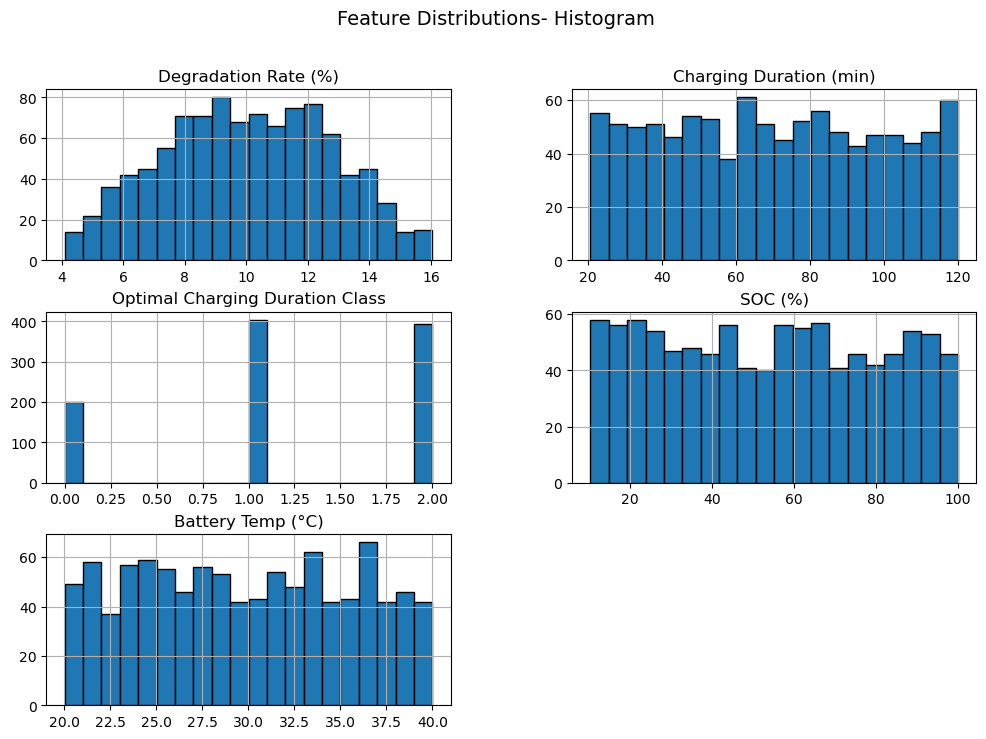

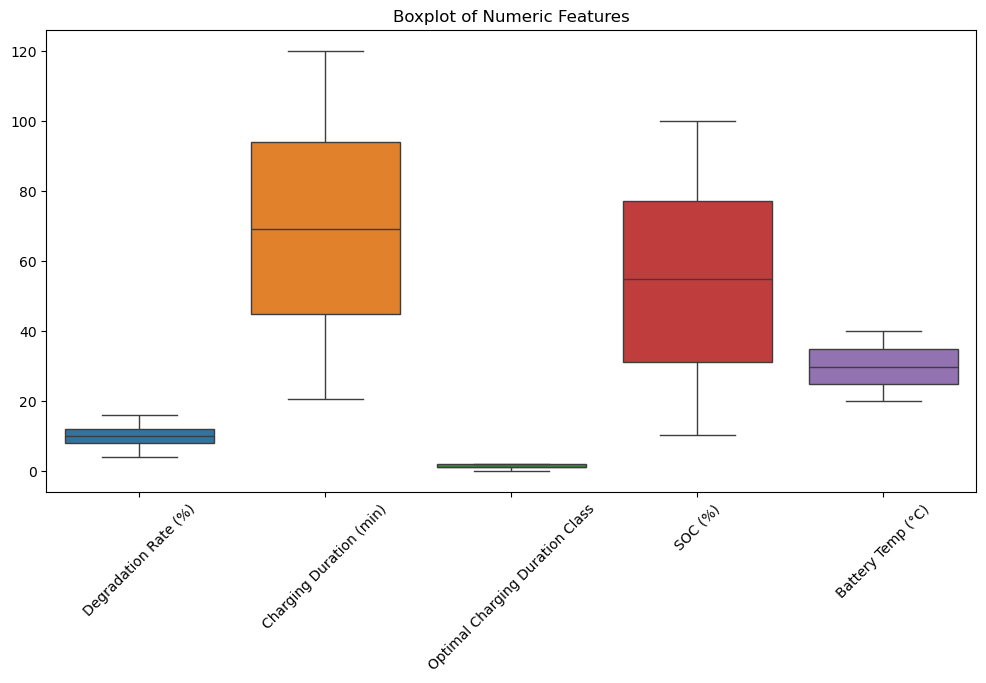

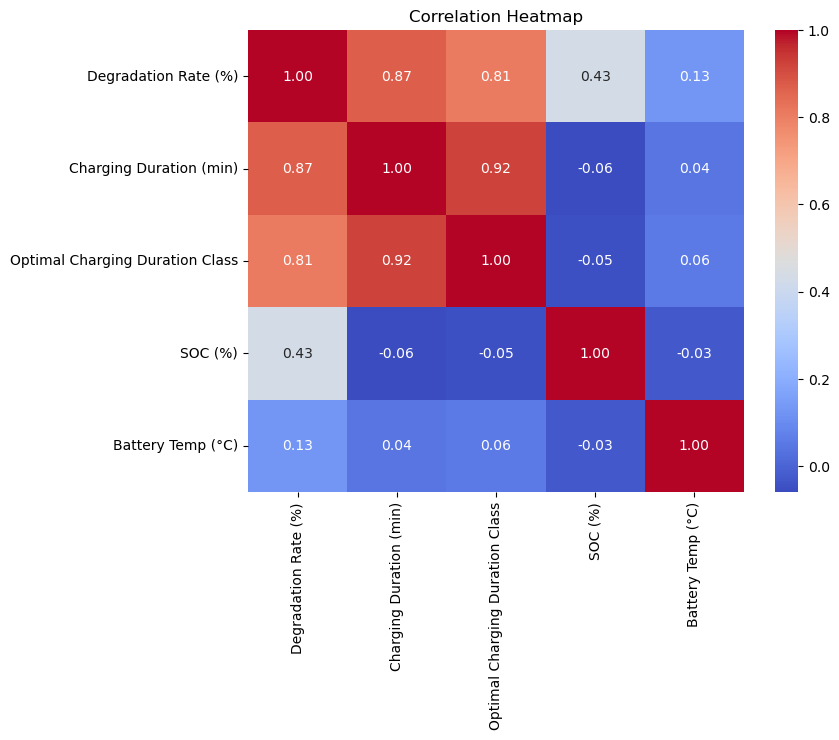

In [58]:
#Performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

file_path = "filtered_ev_battery_data.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nData types:")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

df.replace(['?', '-', 'NA', 'N/A', 'null', 'None'], np.nan, inplace=True)

df.dropna(how='all', inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
    print("\nCategorical columns found:", cat_cols)
    for col in cat_cols:
        df[col] = df[col].astype('category')

df_encoded = pd.get_dummies(df, drop_first=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers detected")

print("\n--- Descriptive Statistics ---")
print(df.describe().T)

df[numeric_cols].hist(bins=20, figsize=(12, 8), edgecolor='black')
plt.suptitle("Feature Distributions- Histogram", fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



